<a href="https://colab.research.google.com/github/tejasspawar/Mumbai_Home_Price_Prediction/blob/main/Mumbai_home_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype
from matplotlib import style
style.use('ggplot')

# Uploading file

In [7]:
from google.colab import files

uploaded = files.upload() # Here we will upload the csv files for this problem

for fn in uploaded.keys():
 print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Loading and Viewing Data

In [8]:
df1 = pd.read_csv('99acres.csv', header=None, skiprows=[0])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,https://static.99acres.com/universalapp/img/no...,14.00,https://www.99acres.com/3-bhk-bedroom-resident...,3 BHK Residential Apartment in Mira Road East,SKD Pinnacolo,https://www.99acres.com/skd-pinnacolo-mira-roa...,₹ 1.3,Cr,"₹ 9,737/sq.ft.","1,335",sq.ft.,(124 sq.m.) Super built-up Area,3 BHK,3 Baths,3 bhk resale flat is available in the promisin...,more,READY TO MOVE,RESALE,RERA,Verified,Share Feedback,Hide,Shortlist,RERA Registered Dealer,"Posted on 13th Apr, 2021 by",Noronha Estate Agency,View Phone Number,Contact Dealer,NaN,NaN,This property has been verified on location by...,Learn more,https://www.99acres.com/property-in-mumbai-ffid#
1,https://static.99acres.com/universalapp/img/no...,20.00,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment in Kharghar,Paradise Sai Solitaire,https://www.99acres.com/paradise-sai-solitaire...,₹ 1.23,Cr,"₹ 10,622/sq.ft.","1,205",sq.ft.,(112 sq.m.) Super built-up Area,2 BHK,2 Baths,One of the premium residential project in khar...,more,READY TO MOVE,RESALE,NaN,Verified,Share Feedback,Hide,Shortlist,Dealer,"Posted on 15th Mar, 2021 by",ROMIL JATANIA REAL ESTATE CONSULTING,View Phone Number,Contact Dealer,NaN,NaN,This property has been verified on location by...,Learn more,https://www.99acres.com/property-in-mumbai-ffid#
2,https://static.99acres.com/universalapp/img/no...,16.00,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment in Ulwe,Balaji Mayuresh Delta,https://www.99acres.com/balaji-mayuresh-delta-...,₹ 1.15,Cr,"₹ 9,274/sq.ft.","1,240",sq.ft.,(115 sq.m.) Super built-up Area,2 BHK,2 Baths,This is a meticulously designed 2 bhk resale a...,more,READY TO MOVE,RESALE,RERA,Verified,Share Feedback,Hide,Shortlist,Dealer,"Posted on 10th Jun, 2021 by",Aaradhya Enterprises,View Phone Number,Contact Dealer,NaN,NaN,This property has been verified on location by...,Learn more,https://www.99acres.com/property-in-mumbai-ffid#
3,https://static.99acres.com/universalapp/img/no...,11.00,https://www.99acres.com/1-bhk-bedroom-resident...,1 BHK Residential Apartment in Vakola,on request,NaN,₹ 1.1,Cr,"₹ 14,473/sq.ft.",760,sq.ft.,(71 sq.m.) Super built-up Area,1 BHK,1 Bath,This is a good 1 bhk flat located in vakola. T...,more,READY TO MOVE,RESALE,NaN,Verified,Share Feedback,Hide,Shortlist,RERA Registered Dealer,"Posted on 08th Jun, 2021 by",ISLAND Properties,View Phone Number,Contact Dealer,NaN,NaN,This property has been verified on location by...,Learn more,https://www.99acres.com/property-in-mumbai-ffid#
4,https://static.99acres.com/universalapp/img/no...,15.00,https://www.99acres.com/2-bhk-bedroom-resident...,2 BHK Residential Apartment in Ghansoli,On request,NaN,₹ 1.7,Cr,"₹ 12,142/sq.ft.","1,400",sq.ft.,(130 sq.m.) Built-up Area,2 BHK,2 Baths,"A 2 bedroom resale flat, located in ghansoli, ...",more,READY TO MOVE,RESALE,NaN,Verified,Share Feedback,Hide,Shortlist,RERA Registered Dealer,"Posted on 13th Feb, 2021 by",Findex Property.com,View Phone Number,Contact Dealer,NaN,NaN,This property has been verified on location by...,Learn more,https://www.99acres.com/property-in-mumbai-ffid#


In [10]:
print("Number of rows are {}, and number of columns are {}".format(df1.shape[0],df1.shape[1]))

Number of rows are 10034, and number of columns are 33


# Preprocessing data

## Droping columns which are not useful

In [11]:
# We will check each and every column one by one to find out weather it has useful data or not after  that we will create list of columns that are useful
#df1[32].head(10)

In [12]:
useful_col = [3, 6, 7, 9, 10, 11, 12, 13, 16, 17]

In [13]:
df2 = df1.iloc[:,useful_col]

## Droping rows which do not have housing details

In [14]:
df3 = df2[~df2[3].isnull()]

## Processing last 2 columns

In [15]:
# Taking useful data from col 17 and saving it in 16
for i in range(len(df3)):
  if(df3.iloc[i,8]=='FEATURED'):
    df3.iloc[i,8]=df3.iloc[i,9]

## Checking if apartment is residential or not

In [16]:
df4 = df3[df3[3].str.contains('Residential Apartment')]

## Generating processed columns 

### Creating Location column

In [17]:
df4['Location'] = None
for i in range(len(df4)):
  pattern = 'Residential Apartment in '
  result = re.finditer(pattern, df4.iloc[i,0])
  end_index = [r.end() for r in result][0]
  df4.iloc[i,10] =  df4.iloc[i,0][end_index:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Creating Price column

In [18]:
df4['Price (Lac)'] = None
for i in range(len(df4)):
  
  price = re.findall('\d*\.?\d+',df4.iloc[i,1])
  
  try: 
    if(len(price)==2):
      if(df4.iloc[i,4]=='sq.ft.'):
        price = (float(price[0])+float(price[1]))/2
      elif(df4.iloc[i,4]=='Cr'):
        price = (float(price[0])+float(price[1])*100)/2 
    else:
      price = float(price[0]) 
    price = round(price,2)
  
    if(df4.iloc[i,2]=='Cr'):
      df4.iloc[i,11] = price*100
    else:
      df4.iloc[i,11] = price
  except:
    df4.iloc[i,11] = None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
df4.head()

,3,6,7,9,10,11,12,13,16,17,Location,Price (Lac)
0,3 BHK Residential Apartment in Mira Road East,₹ 1.3,Cr,"1,335",sq.ft.,(124 sq.m.) Super built-up Area,3 BHK,3 Baths,READY TO MOVE,RESALE,Mira Road East,130.00
1,2 BHK Residential Apartment in Kharghar,₹ 1.23,Cr,"1,205",sq.ft.,(112 sq.m.) Super built-up Area,2 BHK,2 Baths,READY TO MOVE,RESALE,Kharghar,123.00
2,2 BHK Residential Apartment in Ulwe,₹ 1.15,Cr,"1,240",sq.ft.,(115 sq.m.) Super built-up Area,2 BHK,2 Baths,READY TO MOVE,RESALE,Ulwe,115.00
3,1 BHK Residential Apartment in Vakola,₹ 1.1,Cr,760,sq.ft.,(71 sq.m.) Super built-up Area,1 BHK,1 Bath,READY TO MOVE,RESALE,Vakola,110.00
4,2 BHK Residential Apartment in Ghansoli,₹ 1.7,Cr,"1,400",sq.ft.,(130 sq.m.) Built-up Area,2 BHK,2 Baths,READY TO MOVE,RESALE,Ghansoli,170.00


In [20]:
df4 = df4[~df4['Price (Lac)'].isnull()]

### Creating Area column

In [21]:
df4['Area (sq.ft)'] = None
for i in range(len(df4)):
  area = re.findall('\d*\.?\d+',df4.iloc[i,3].replace(',',''))
  try: 
    if(len(area)==2):
      area = (float(area[0])+float(area[1]))/2
    else:
      area = float(area[0]) 
    area = round(area,2)
    df4.iloc[i,12] = area

  except:
    df4.iloc[i,12] = None  
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Creating BHK column

In [22]:
df4['BHK'] = None
for i in range(len(df4)):
  try:
    bhk = int(re.findall('\d*\.?\d+',df4.iloc[i,6])[0])
    df4.iloc[i,13] = bhk
  except:
    df4.iloc[i,13] = None  

In [23]:
df4 = df4[~df4[ 'BHK'].isnull()]

### Creating Bathrooms column

In [24]:
df4['Bathrooms'] = None
for i in range(len(df4)):
  try:
    if(pd.isnull(df4.iloc[i,7]) & ('Bath' in df4.iloc[i,5])):
      bath = int(re.findall('\d*\.?\d+',df4.iloc[i,5])[0])
      df4.iloc[i,14] = bath
    elif(~pd.isnull(df4.iloc[i,7])):
      bath = int(re.findall('\d*\.?\d+',df4.iloc[i,7])[0])
      df4.iloc[i,14] = bath
  except:
    df4.iloc[i,14] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
# Filling nan values in bathrooms column
for i in range(len(df4)):
  if(pd.isnull(df4.iloc[i,14])):
    df4.iloc[i,14]=df4.iloc[i,13]

### Creating Status column

In [26]:
df4['Status'] = df4[16]

## Removing useless columns

In [27]:
df5 = df4.drop([3,6,7,9,10,11,12,13,16,17], axis=1)

## Analyzing Location column

In [28]:
df5['Location'] = df5['Location'].apply(lambda x: x.strip())
location_count = df5.groupby('Location')['Location'].agg('count')

In [29]:
print('There are {} unique locations'.format(len(location_count)))

There are 2047 unique locations


In [30]:
print('There are {} unique locations with value count of greater than 10'.format(len(location_count[location_count>10])))

There are 149 unique locations with value count of greater than 10


In [31]:
# We will name all locations with value count less than or equal to 10 as other
location_count_10 = location_count[location_count<=10]
df5['Location'] = df5['Location'].apply(lambda x: 'other' if x in location_count_10 else x)

## Changing dtypes of columns

In [32]:
df5['Price (Lac)'] = df5['Price (Lac)'].apply(pd.to_numeric)
df5['Area (sq.ft)'] = df5['Area (sq.ft)'].apply(pd.to_numeric)
df5['BHK'] = df5['BHK'].apply(pd.to_numeric)
df5['Bathrooms'] = df5['Bathrooms'].apply(pd.to_numeric)

## Outlier detection

In [33]:
df5.describe()

,Price (Lac),Area (sq.ft),BHK,Bathrooms
count,8534.00,8534.00,8534.00,8534.00
mean,99.37,865.01,1.60,1.66
std,116.40,6075.01,0.72,0.69
min,5.50,1.00,1.00,1.00
25%,35.00,550.00,1.00,1.00
50%,63.00,677.00,1.00,2.00
75%,120.00,960.00,2.00,2.00
max,2500.00,559723.00,6.00,6.00


### Bathroom outliers with respect to BHK

In [34]:
# Removing rows where number of bathrooms are more than 2 + BHK (from domain knowledge)
df5 = df5[~(df5['Bathrooms']>2+df5['BHK'])]

### Area per BHK outliers

In [35]:
# Removing rows where area per bhk is less than 300 (from domain knowledge)
df5 = df5[~(df5['Area (sq.ft)']/df5['BHK']<300)]

### Price per sq.ft outliers

In [36]:
# Creating feature to check price outliers
df5['Price per sq.ft (₹)'] = 100000*df5['Price (Lac)']/df5['Area (sq.ft)'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Checking stats of Price per sq.ft
df5['Price per sq.ft (₹)'].describe()

count     8094.00
mean     11876.94
std      10930.38
min          3.75
25%       5376.34
50%       8333.33
75%      15644.20
max     380000.00
Name: Price per sq.ft (₹), dtype: float64

In [38]:
price_range = (3000,40000) # Decided after research
df5 = df5[(df5['Price per sq.ft (₹)']<price_range[1]) & (df5['Price per sq.ft (₹)']>price_range[0])]

### Price outliers

In [39]:
df5['Price (Lac)'].describe()

count   7809.00
mean      93.45
std       93.72
min       11.00
25%       35.00
50%       62.00
75%      115.00
max     1675.00
Name: Price (Lac), dtype: float64

In [40]:
max_price = 1200
df5 = df5[~(df5['Price (Lac)']>max_price)]

### Area outliers

In [41]:
df5['Area (sq.ft)'].describe()

count   7807.00
mean     796.47
std      366.47
min      300.00
25%      565.00
50%      690.00
75%      972.00
max     5400.00
Name: Area (sq.ft), dtype: float64

In [42]:
df6 = df5[~(df5['Area (sq.ft)']>6000)]

Now data is ready for visualization

# Visualization

## Plotting columns independently

### Bar chart of Location

In [74]:
# Genrating list of locations with value counts greater than 100
location_count = df6.groupby('Location')['Location'].agg('count')
location_count_100 = location_count[location_count>100].drop('other')

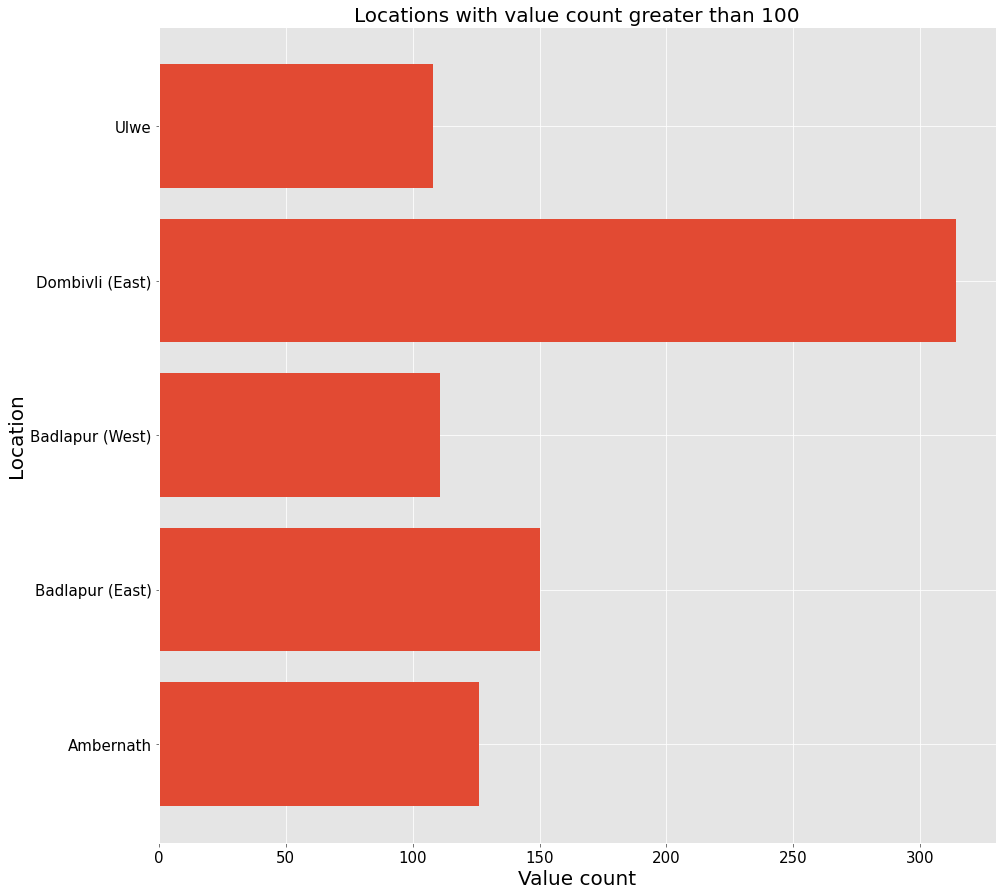

In [75]:
plt.figure(figsize=(15,15))
plt.barh(location_count_100.index,location_count_100.values)
plt.title('Locations with value count greater than 100',color = 'black', fontsize=20)
plt.xticks(color = 'black', fontsize=15)
plt.yticks(color = 'black', fontsize=15)
plt.xlabel('Value count',color = 'black', fontsize=20)
plt.ylabel('Location',color = 'black', fontsize=20)
plt.show()

### Bar chart of Status

In [76]:
status = df6.groupby('Status')['Status'].agg('count')

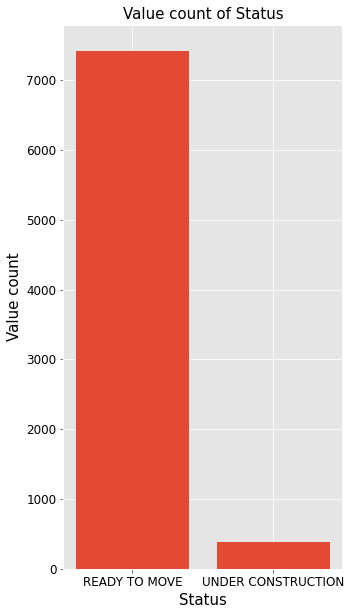

In [77]:
plt.figure(figsize=(5,10))
plt.bar(status.index,status.values)
plt.title('Value count of Status',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Status',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Bar chart of BHK

In [78]:
bhk = df6.groupby('BHK')['BHK'].agg('count')

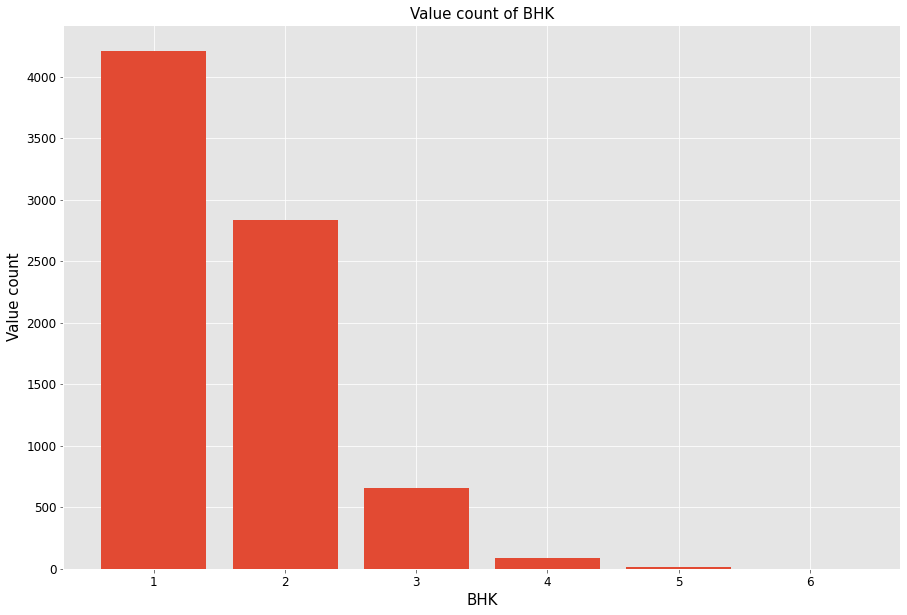

In [79]:
plt.figure(figsize=(15,10))
plt.bar(bhk.index,bhk.values)
plt.title('Value count of BHK',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('BHK',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Bar chart of Bathrooms

In [80]:
bath = df6.groupby('Bathrooms')['Bathrooms'].agg('count')

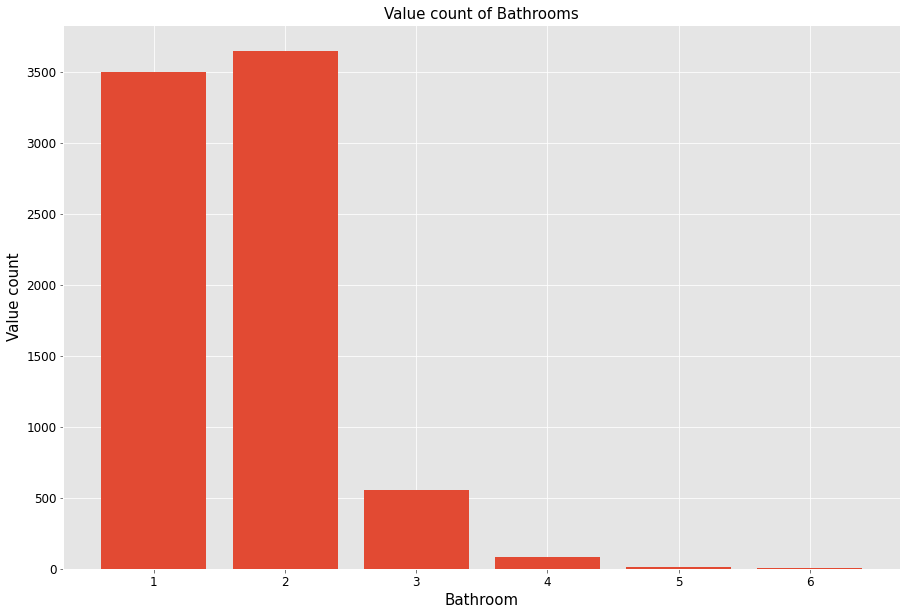

In [81]:
plt.figure(figsize=(15,10))
plt.bar(bath.index,bath.values)
plt.title('Value count of Bathrooms',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Bathroom',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Area

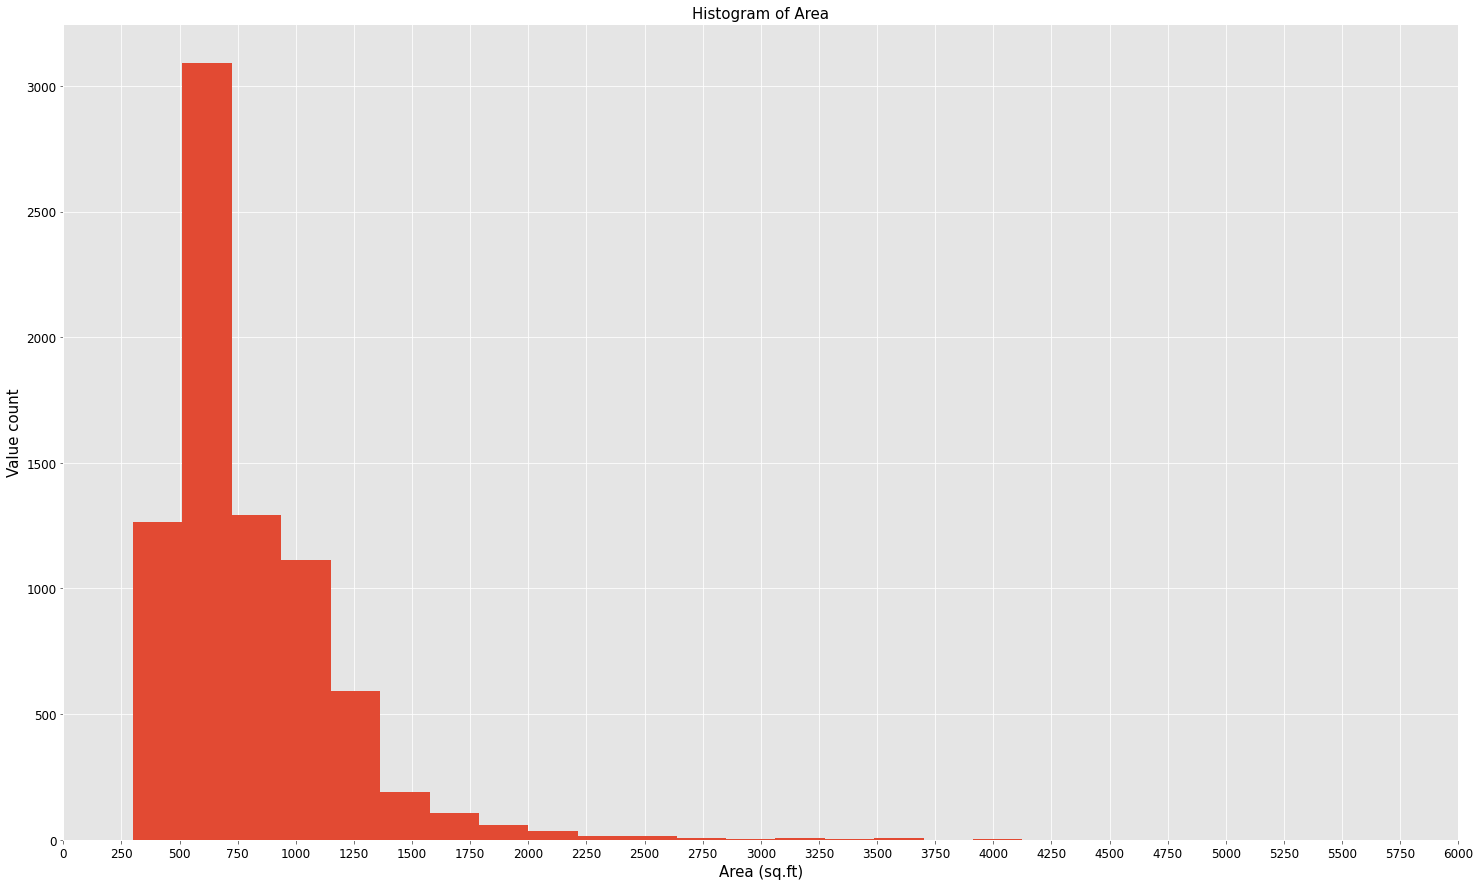

In [82]:
plt.figure(figsize=(25,15))
plt.hist(df6['Area (sq.ft)'],24)
plt.title('Histogram of Area',color = 'black', fontsize=15)
plt.xticks(range(0,6250,250), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Area (sq.ft)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Price

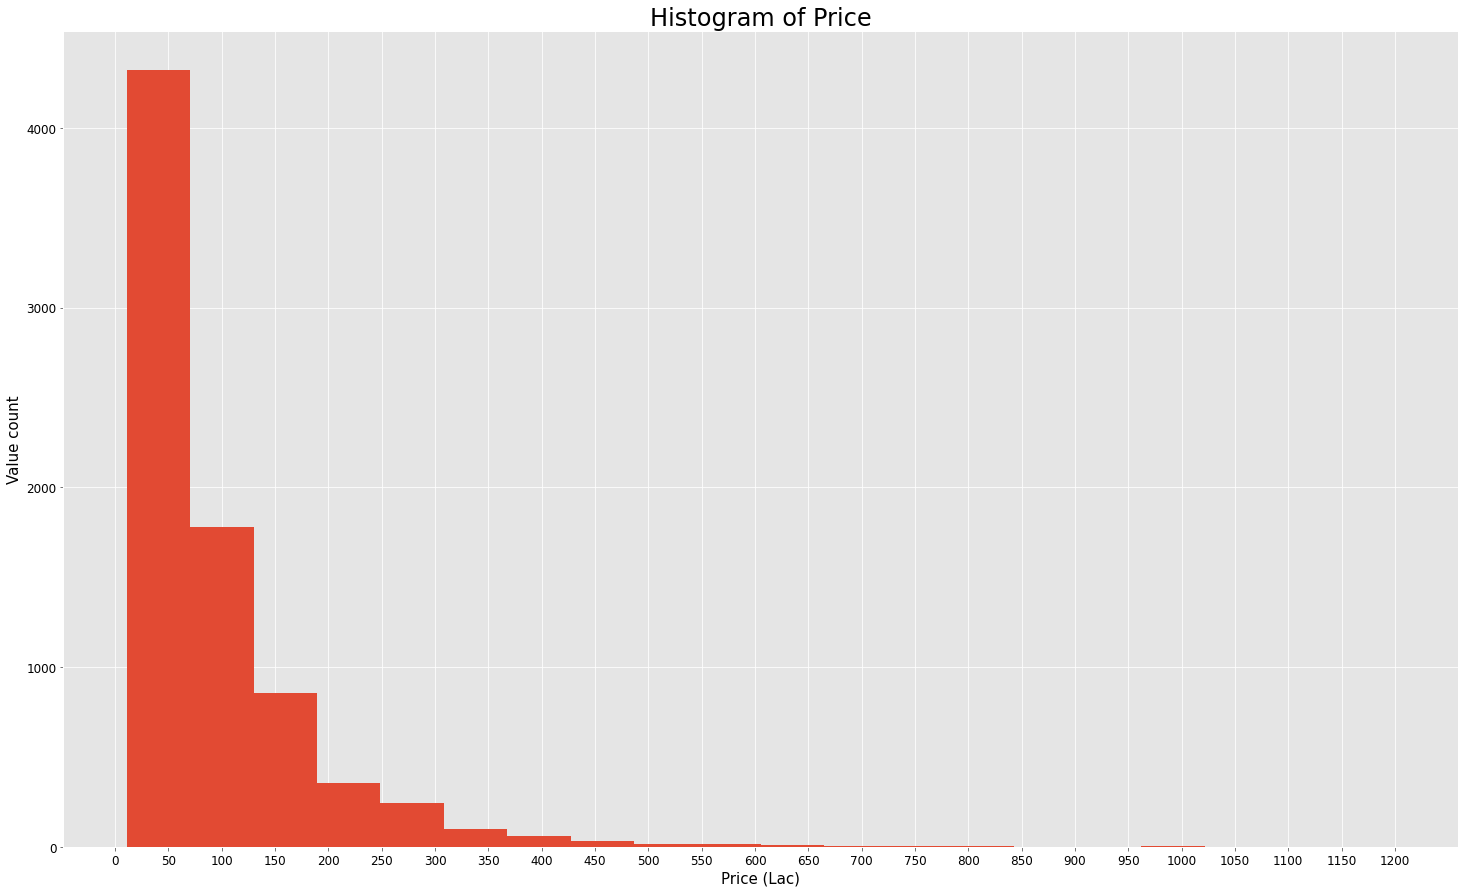

In [83]:
plt.figure(figsize=(25,15))
plt.hist(df6['Price (Lac)'],20)
plt.title('Histogram of Price',color = 'black', fontsize=24)
plt.xticks(range(0,1250,50), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Price (Lac)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

### Histogram of Price per sq.ft  

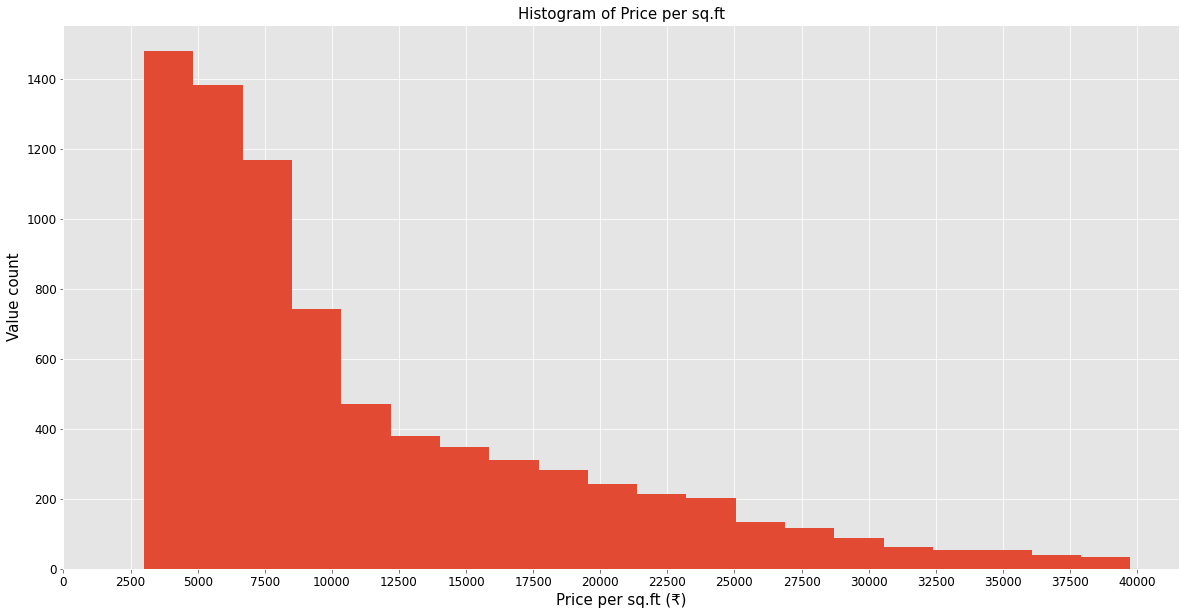

In [84]:
plt.figure(figsize=(20,10))
plt.hist(df6['Price per sq.ft (₹)'],20)
plt.title('Histogram of Price per sq.ft',color = 'black', fontsize=15)
plt.xticks(range(0,42500,2500), color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Price per sq.ft (₹)',color = 'black', fontsize=15)
plt.ylabel('Value count',color = 'black', fontsize=15)
plt.show()

## Scatter plots with price

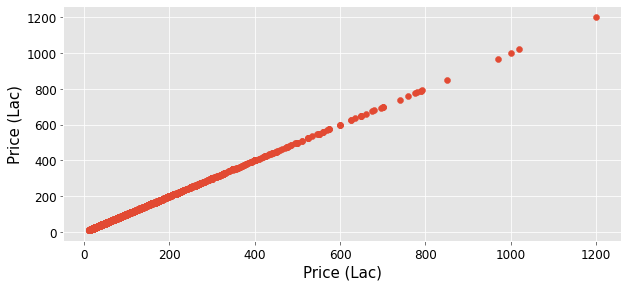

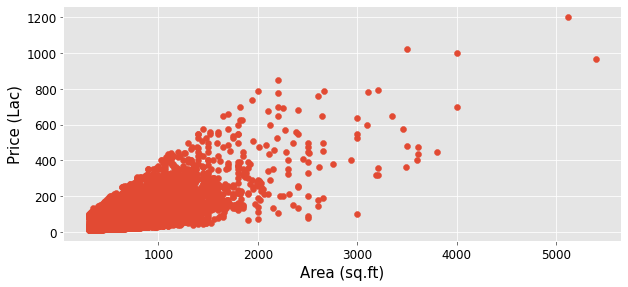

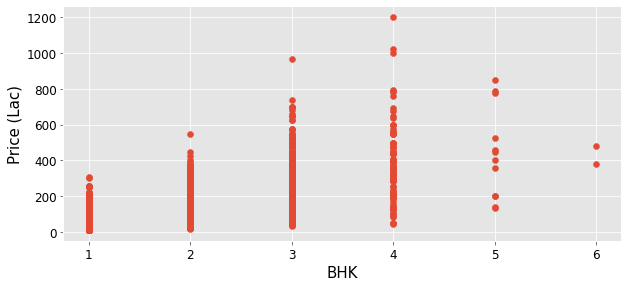

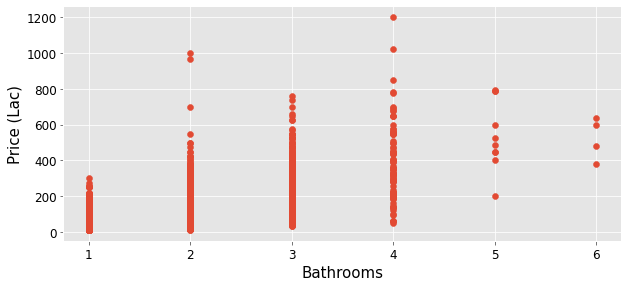

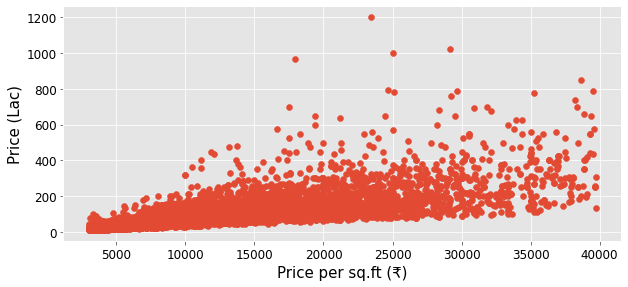

In [85]:
iter = 1
for col in df6.columns.values:
  if(is_numeric_dtype(df6[col])):
    plt.figure(figsize=(10,25))
    plt.subplot(5,1,iter)
    plt.scatter(df6[col],df6['Price (Lac)'])
    plt.xticks(color = 'black', fontsize=12)
    plt.yticks(color = 'black', fontsize=12)
    plt.xlabel(col,color = 'black', fontsize=15)
    plt.ylabel('Price (Lac)',color = 'black', fontsize=15)
    plt.show()
    iter+=1


Observations


*   All features are positively correlated with Price




## Bar chart of Locations representing price

In [86]:
location_prices = df6.groupby('Location').mean()['Price (Lac)']
location_price_300 = location_prices[location_prices>300]

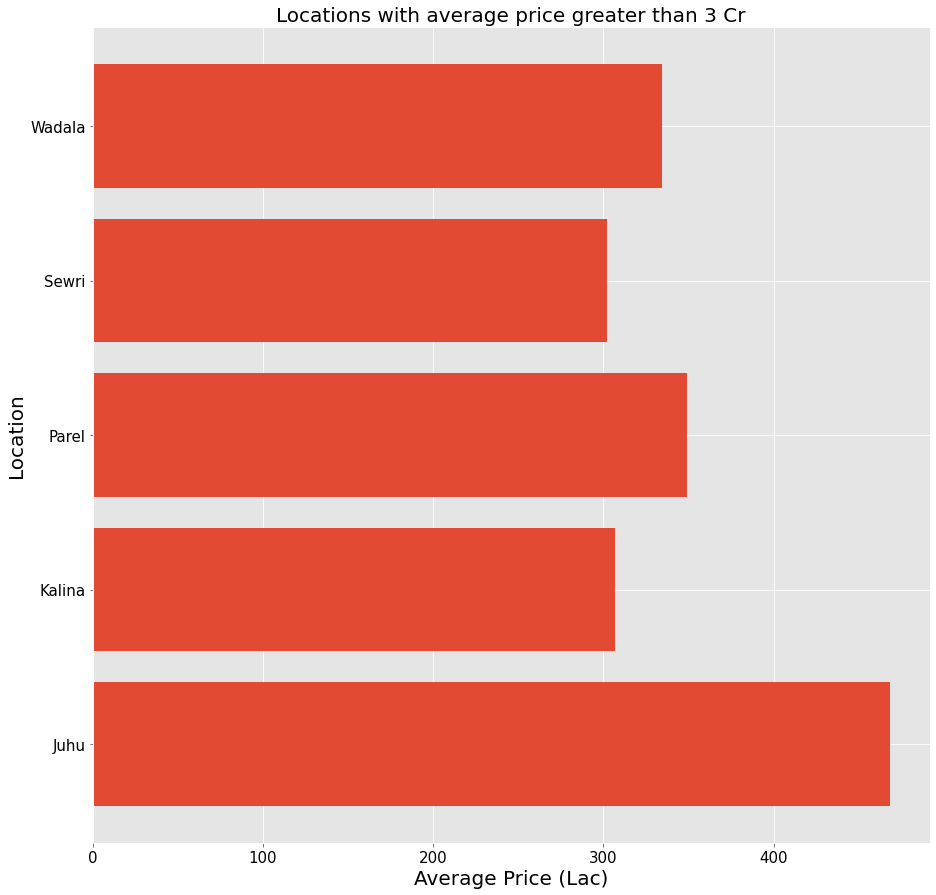

In [87]:
plt.figure(figsize=(15,15))
plt.barh(location_price_300.index,location_price_300.values)
plt.title('Locations with average price greater than 3 Cr',color = 'black', fontsize=20)
plt.xticks(color = 'black', fontsize=15)
plt.yticks(color = 'black', fontsize=15)
plt.xlabel('Average Price (Lac)',color = 'black', fontsize=20)
plt.ylabel('Location',color = 'black', fontsize=20)
plt.show()

## Bar chart of Status representing price

In [88]:
status_price = df6.groupby('Status').mean()['Price (Lac)']

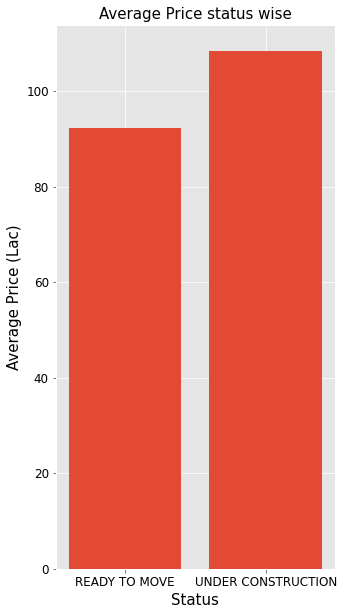

In [89]:
plt.figure(figsize=(5,10))
plt.bar(status_price.index,status_price.values)
plt.title('Average Price status wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Status',color = 'black', fontsize=15)
plt.ylabel('Average Price (Lac)',color = 'black', fontsize=15)
plt.show()

## Heat map of corelation matrix

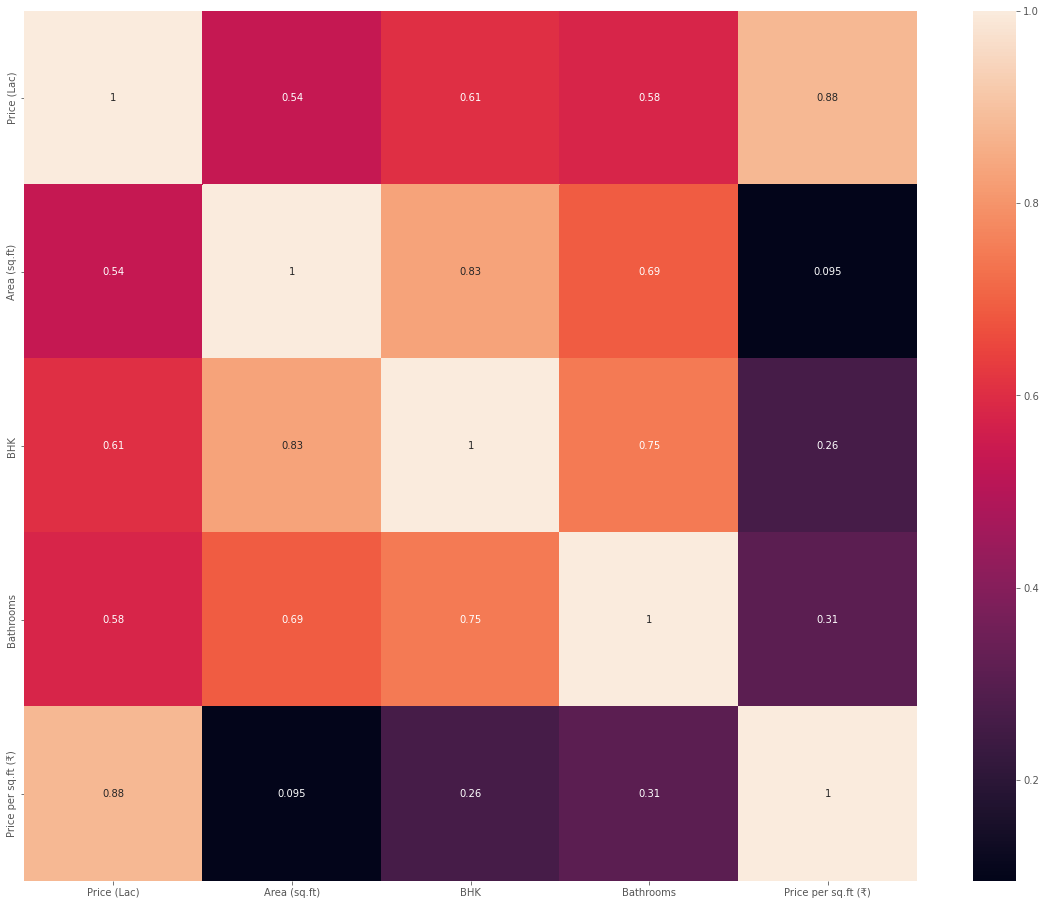

In [90]:
corrMatrix=df6.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corrMatrix,annot=True)
plt.show()

Observaions



*   BHK and Area are highly correlated 
*   BHK and Bathroom are highly correlated



# Feature Engineering

## Seperating X and y

In [91]:
len(df6['Location'].unique())

150

In [92]:
X = df6.drop(['Price (Lac)', 'Price per sq.ft (₹)'], axis=1)
y = df6['Price (Lac)']

## One hot encoding of Object columns

In [93]:
# Encoding Status column
X['Status'] = X['Status'].apply(lambda x: 1 if x=='READY TO MOVE' else 0)

In [94]:
# Encoding Location column
dummies = pd.get_dummies(X['Location'])
X = pd.concat([X,dummies.drop('other', axis=1)], axis='columns')
del X['Location']

## Train-Test split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Standardization

In [96]:
# Changing dimensions of dependent variable
y_train = np.array(y_train.values.tolist()).reshape(len(y_train),1)
y_test = np.array(y_test.values.tolist()).reshape(len(y_test),1)

In [97]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[['Area (sq.ft)', 'BHK', 'Bathrooms']] = sc_X.fit_transform(X_train[['Area (sq.ft)', 'BHK', 'Bathrooms']])
X_test[['Area (sq.ft)', 'BHK', 'Bathrooms']] = sc_X.transform(X_test[['Area (sq.ft)', 'BHK', 'Bathrooms']])
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# Selecting Regression Model

## LASSO

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

print('Training LASSO regression using GridSearchCV')

scoring='r2' # Criterian for hyperparameter selection is R squared
  

model = linear_model.Lasso()

hyperparameters = {'alpha':(1,0.05,0.001,0.)}

clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(y_train))

print('Best parameters:')
print(clf.best_params_)
print('Best Rsquared score: '+ str(clf.best_score_))


Training LASSO regression using GridSearchCV


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+02, tolerance: 4.841e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

Best parameters:
{'alpha': 0.0}
Best Rsquared score: 0.6419357880456189


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+03, tolerance: 6.245e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Ridge

In [99]:
from sklearn.linear_model import Ridge

print('Training Ridge regression using GridSearchCV')

scoring='r2'

model = linear_model.Ridge()

hyperparameters = {'alpha':(0,1,5,50)}

clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(y_train))

print('Best parameters:')
print(clf.best_params_)
print('Best Rsquared score: '+ str(clf.best_score_))

Training Ridge regression using GridSearchCV
Best parameters:
{'alpha': 1}
Best Rsquared score: 0.6430768744714772


## Random Forest

In [100]:
#from sklearn.ensemble import RandomForestRegressor

#print('Training Random Forest Regressor using GridSearchCV')

#scoring='r2' 

#model = RandomForestRegressor(random_state=0)

#hyperparameters = {'max_depth':[65],'n_estimators':[300]}

#clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
#clf.fit(np.array(X_train), np.squeeze(y_train))

#print('Best parameters:')
#print(clf.best_params_)
#print('Best mae score: '+ str(abs(clf.best_score_)))



## SVR

In [101]:
#from sklearn.svm import SVR

#print('Training Support Vector Regression using GridSearchCV')

#scoring='r2' 

#model = SVR(kernel='linear')

#hyperparameters = {'C':[0.1],'degree':[3,5,8]}

#clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
#clf.fit(np.array(X_train), np.squeeze(y_train))

#print('Best parameters:')
#print(clf.best_params_)
#print('Best mae score: '+ str(abs(clf.best_score_)))

Linear Regression is giving max R-squared

# Final Model - Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
print('R-squared of for Linear Regression is {}'.format(round(reg.score(X, y),3)))

R-squared of for Linear Regression is 0.664


In [102]:
def predictPrice(location,area,bhk,bath,status):
  try:
    loc_index = np.where(X.columns==location)[0][0]
  except:
    loc_index = 0  

  x = np.zeros(len(X.columns))
  x[0] = area
  x[1] = bhk
  x[2] = bath
  x[3] = status
  if(loc_index>0):
    x[loc_index] = 1
  return reg.predict([x])

In [73]:
predictPrice('Pokhran-2',1268,3,3,1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([254.12300407])